In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [24]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [25]:
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [26]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df.tail()

,sepal length,sepal width,petal length,petal width,target
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [28]:
df = df.drop("petal width",axis=1)

In [44]:
df.tail()

,sepal length,sepal width,petal length,target
145,6.7,3.0,5.2,Iris-virginica
146,6.3,2.5,5.0,Iris-virginica
147,6.5,3.0,5.2,Iris-virginica
148,6.2,3.4,5.4,Iris-virginica
149,5.9,3.0,5.1,Iris-virginica


In [30]:

features = ['sepal length', 'sepal width', 'petal length',]
x = df.loc[:, features].values

In [31]:
y = df.loc[:,['target']].values

In [32]:
x = StandardScaler().fit_transform(x)

In [33]:
pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length
0,-0.900681,1.032057,-1.341272
1,-1.143017,-0.124958,-1.341272
2,-1.385353,0.337848,-1.398138
3,-1.506521,0.106445,-1.284407
4,-1.021849,1.263460,-1.341272


In [34]:
pca = PCA(n_components=2)

In [35]:
principalComponents = pca.fit_transform(x)

In [36]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [37]:
principalDf.head()

,PC1,PC2
0,-1.859526,0.449173
1,-1.602669,-0.697065
2,-1.958848,-0.387732
3,-1.874922,-0.639969
4,-2.018002,0.605866


In [38]:
df[['target']].head()

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [39]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,PC1,PC2,target
0,-1.859526,0.449173,Iris-setosa
1,-1.602669,-0.697065,Iris-setosa
2,-1.958848,-0.387732,Iris-setosa
3,-1.874922,-0.639969,Iris-setosa
4,-2.018002,0.605866,Iris-setosa


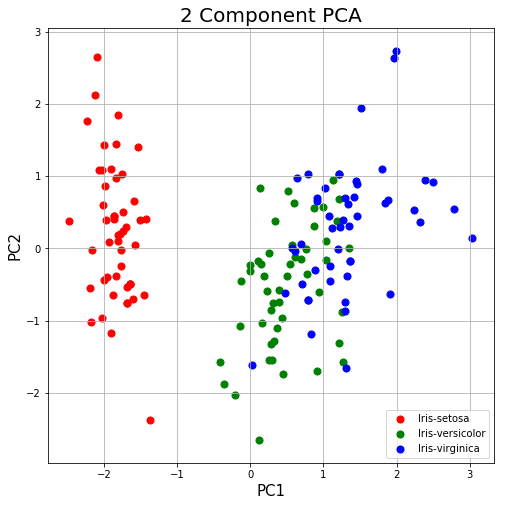

In [40]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()